Source - http://jee3.web.rice.edu/neuralnets-1.r

Similar - [files](https://www.google.com/search?q=site%3Ajee3.web.rice.edu&oq=site%3Ajee3.web.rice.edu&aqs=chrome..69i57j69i58.10815j0j4&sourceid=chrome&es_sm=119&ie=UTF-8) [.r](https://www.google.com/search?num=100&newwindow=1&q=site%3Ajee3.web.rice.edu+filetype%3Ar&oq=site%3Ajee3.web.rice.edu+filetype%3Ar&gs_l=serp.3...73057.76281.0.76417.15.12.2.0.0.0.176.1122.9j3.12.0....0...1c.1.64.serp..15.0.0.qUJUf5yfX8w)



- [Lecture 4](jee3.web.rice.edu/506lecture4.r) # metropolis-hastings algorithm
- [Lecture 5](jee3.web.rice.edu/lecture5.r) # Hypothesis Testing # POLS 509: The Linear Model
- [Lecture 7](jee3.web.rice.edu/lecture7.r) # Multicollinearity, Heteroskedasticity, Omitted Variable Bias





In [1]:
rm(list=ls())
set.seed(1231239)

In [2]:
# Create an unusual regression problem
# Note that these variables will already have the proper scaling
x<-runif(1000)
z<-runif(1000)

# The relationship between y and the independent variables is complex and non-linear
y <- sin(3*pi*x)+cos(3*pi*z)+rnorm(1000, mean=0, sd=0.25)  

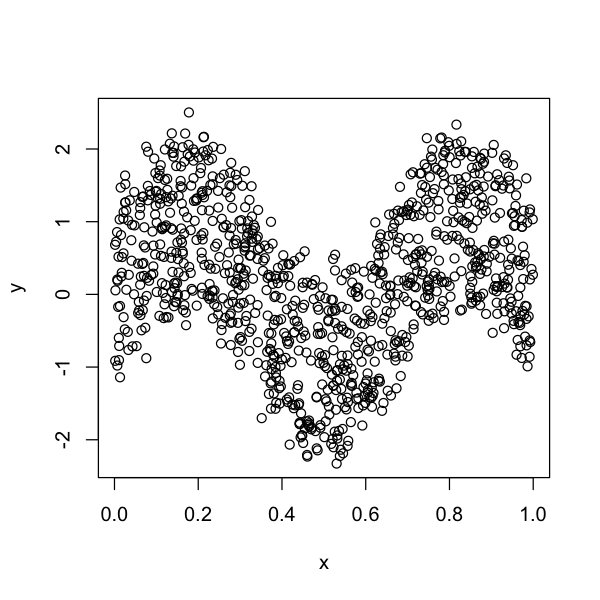

In [3]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(y~x)

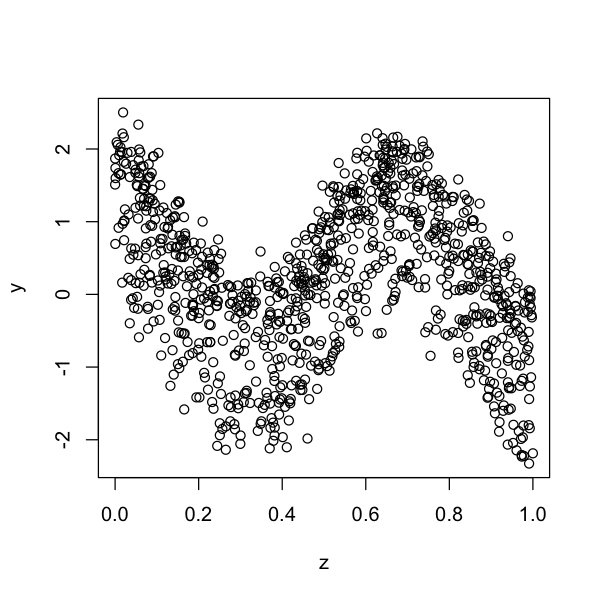

In [4]:
plot(y~z)

In [5]:
dat <- data.frame(x,z,y)
head(dat)

,x,z,y
1,0.9482295,0.4363093,-0.1016586
2,0.1703275,0.9801482,-0.2491468
3,0.8830342,0.1938368,0.610485
4,0.2812241,0.3948473,-0.3782473
5,0.3977685,0.8244907,-0.342096
6,0.3933799,0.9425845,-1.290799


In [8]:
# Estimate a neural network with one hidden layer of 4 nodes
library(neuralnet)
nn <- neuralnet(y~x+z, data=dat, hidden=4, stepmax=2e05, 
              threshold=0.02, lifesign="full")

# hidden - vector of integers specifying the number of hidden neurons (vertices) in each layer.
# threshold - for the partial derivatives of the error function as stopping criteria.
# maxsteps - maximum steps for the training of the neural network.
# lifesign - how much will print during the calculation of neural network. 'none', 'minimal' or 'full'

hidden: 4    thresh: 0.02    rep: 1/1    steps:    1000	min thresh: 1.17081744
                                                   2000	min thresh: 0.5606546504
                                                   3000	min thresh: 0.4574586538
                                                   4000	min thresh: 0.329994331
                                                   5000	min thresh: 0.2506402854
                                                   6000	min thresh: 0.1741750474
                                                   7000	min thresh: 0.1314413678
                                                   8000	min thresh: 0.09817667479
                                                   9000	min thresh: 0.08542526048
                                                  10000	min thresh: 0.06578535018
                                                  11000	min thresh: 0.06578535018
                                                  12000	min thresh: 0.06578535018
                          

In [6]:
?neuralnet

No documentation for 'neuralnet' in specified packages and libraries:
you could try '??neuralnet'

In [9]:
nn$weights

[[1]]
[[1]][[1]]
              [,1]          [,2]          [,3]         [,4]
[1,]   5.142850091 -19.324674704 -0.6530976558 -5.901272571
[2,] -17.206016358  29.299651911 -8.9619606984  2.270634827
[3,]   1.224452884   1.004443154 -0.6308870589 40.158096530

[[1]][[2]]
              [,1]
[1,] -0.0258418992
[2,]  2.7095151502
[3,]  1.9654635357
[4,] -5.4552801987
[5,] -1.3216101500

In [12]:
options(jupyter.plot_mimetypes = "image/png") 

In [14]:
plot(nn)

dev.new(): using pdf(file="Rplots2.pdf")


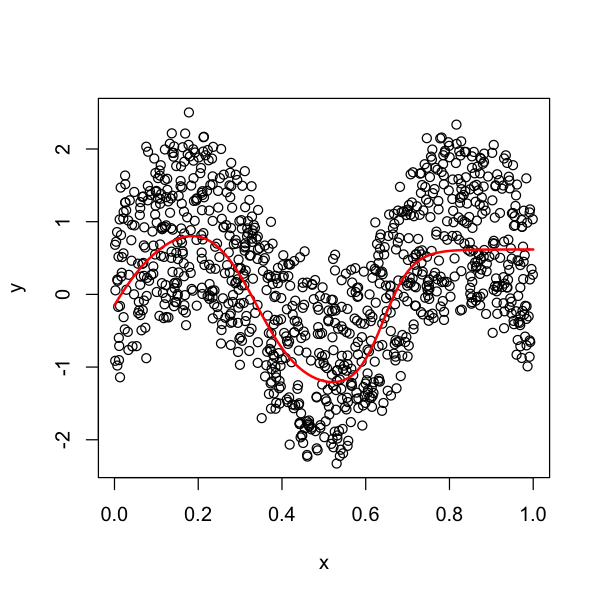

In [15]:
# Does the predictions of the neural network look good?
x.test <- seq(from=0, to=1, by=0.01)
y.fit <- compute(nn, covariate=matrix(c(x.test, rep(0.5, length(x.test))), nrow=length(x.test), ncol=2))$net.result
plot(y~x, data=dat)
lines(y.fit~x.test, type="l", col="red", lwd=2)

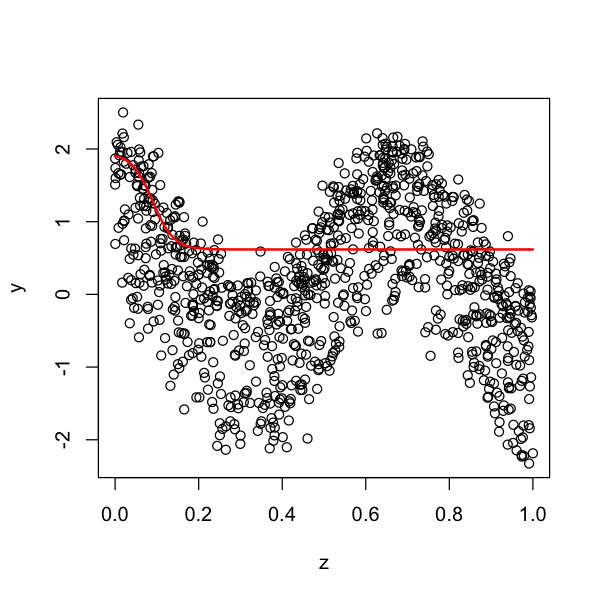

In [16]:
z.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(rep(1, length(z.test)), z.test), nrow=length(z.test), ncol=2))$net.result
plot(y~z, data=dat)
lines(y.fit~z.test, type="l", col="red", lwd=2)
#...no. We need to allow a more complex fitting surface.

In [17]:
# Try eight nodes in the hidden layer.
nn <- neuralnet(y~x+z, data=dat, hidden=8, stepmax=2e05, 
              threshold=0.02, lifesign="full")

hidden: 8    thresh: 0.02    rep: 1/1    steps:    1000	min thresh: 2.335806335
                                                   2000	min thresh: 0.9085522569
                                                   3000	min thresh: 0.8757535069
                                                   4000	min thresh: 0.7095546391
                                                   5000	min thresh: 0.3822386469
                                                   6000	min thresh: 0.2848853
                                                   7000	min thresh: 0.2107871274
                                                   8000	min thresh: 0.1952033997
                                                   9000	min thresh: 0.1717290745
                                                  10000	min thresh: 0.1322969492
                                                  11000	min thresh: 0.1322969492
                                                  12000	min thresh: 0.115971926
                                 

In [18]:
plot(nn)

dev.new(): using pdf(file="Rplots7.pdf")


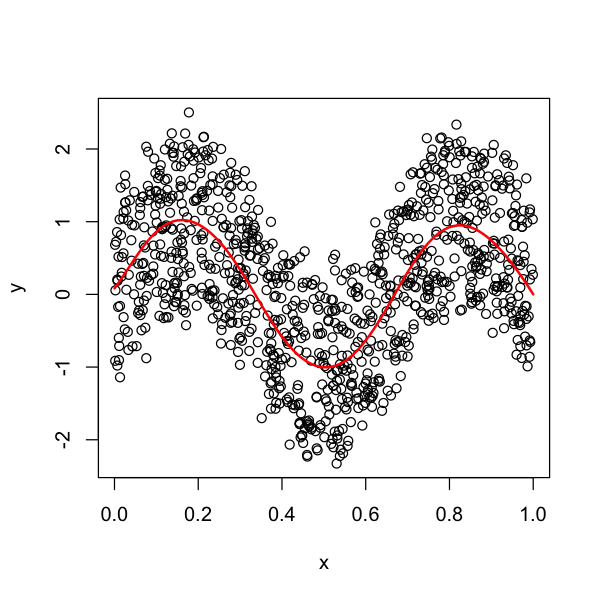

In [19]:
x.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(x.test, rep(0.5, length(x.test))), nrow=length(x.test), ncol=2))$net.result
plot(y~x, data=dat)
lines(y.fit~x.test, type="l", col="red", lwd=2)

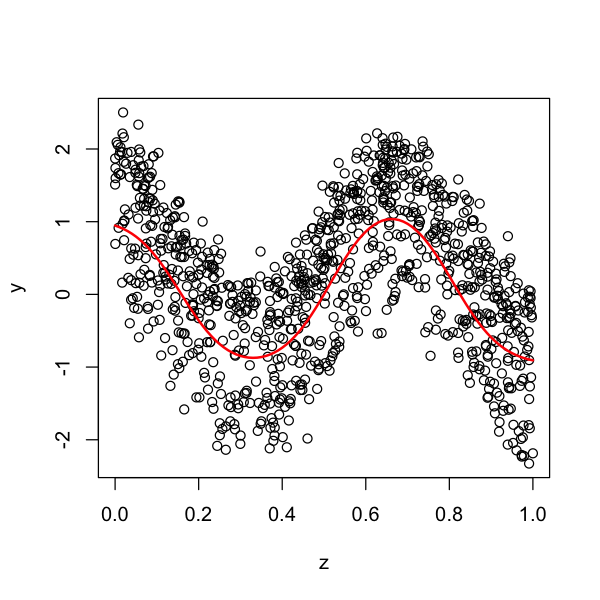

In [20]:
z.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(rep(1, length(z.test)), z.test), nrow=length(z.test), ncol=2))$net.result
plot(y~z, data=dat)
lines(y.fit~z.test, type="l", col="red", lwd=2)
# much better!

----

In [21]:
rm(list=ls())
set.seed(29124)

In [22]:
# create a complex classification problem
x <- runif(1000)
z <- runif(1000)
o <- order(z)

In [23]:
# the points will lie (noisily) in one class if inside
# a circle centered at zero with radius (0.5)^(1/2), and 
# in another class if outside this circle
y <- ifelse(x^2 + z^2 + runif(1000, min=-0.15, max=0.15)>0.5, 1, 0)

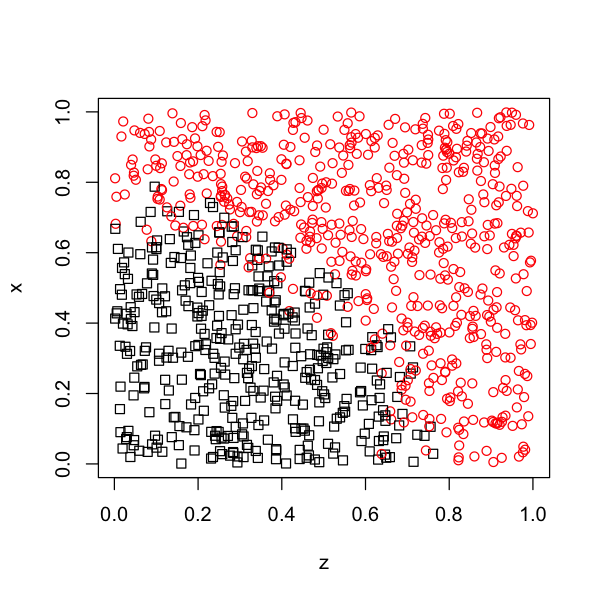

In [24]:
plot(x~z, col=y+1, pch = y)

In [25]:
dat<-data.frame(x,z,y)

In [26]:
# can a glm (probit) model correctly classify these observations?
glm.mod<-glm(y~x+z, family=binomial)

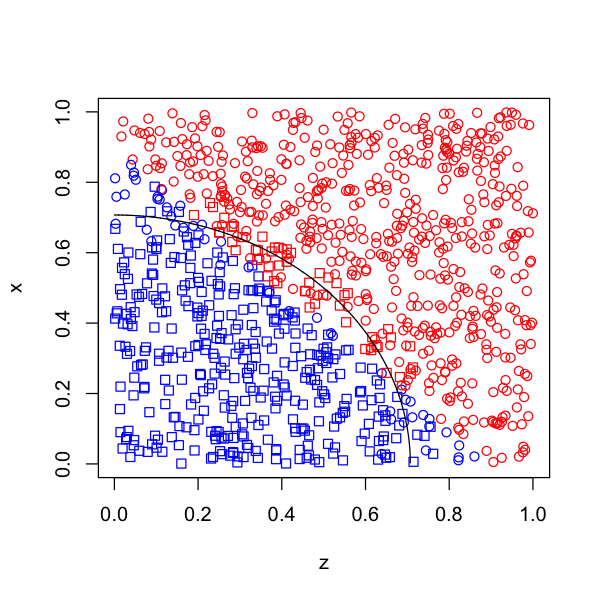

In [27]:
glm.class<-ifelse(predict(glm.mod, type="response")>0.5, "red", "blue")
plot(x~z, pch=y, col=glm.class)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
#...no, or at least not without some substantial modification
# (like polynomial terms). It draws a line through the circular boundary space.

In [28]:
# a neural network with a single layer of four hidden nodes performs this easily.
# 
library(neuralnet)
nn<-neuralnet(y~x+z, data=dat, linear.output=FALSE, hidden=4, lifesign="full")

hidden: 4    thresh: 0.01    rep: 1/1    steps:    1000	min thresh: 0.02748038646
                                                   2000	min thresh: 0.02748038646
                                                   3000	min thresh: 0.02748038646
                                                   4000	min thresh: 0.02166207774
                                                   5000	min thresh: 0.02166207774
                                                   6000	min thresh: 0.02166207774
                                                   7000	min thresh: 0.02166207774
                                                   8000	min thresh: 0.02166207774
                                                   9000	min thresh: 0.02166207774
                                                  10000	min thresh: 0.02166207774
                                                  11000	min thresh: 0.02166207774
                                                  12000	min thresh: 0.02166207774
                

In [30]:
plot(nn)

dev.new(): using pdf(file="Rplots20.pdf")


Data Error:	0;


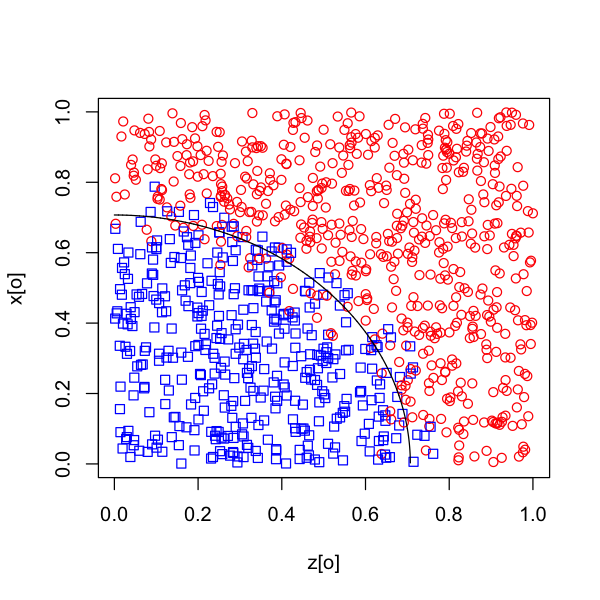

In [29]:
# inside the sample data set, the neural network model classifies quite well.
# 
nn.dat<-prediction(nn)$data
nn.class<-ifelse(nn.dat[,"y"]>0.5, "red", "blue")
plot(x[o]~z[o], pch=y[o], col=nn.class)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
# ...maybe a little too well. Might be some evidence of overfitting.
# How does it do out of sample?

In [ ]:
#?compute # - Computation of a given neural network for given covariate vectors

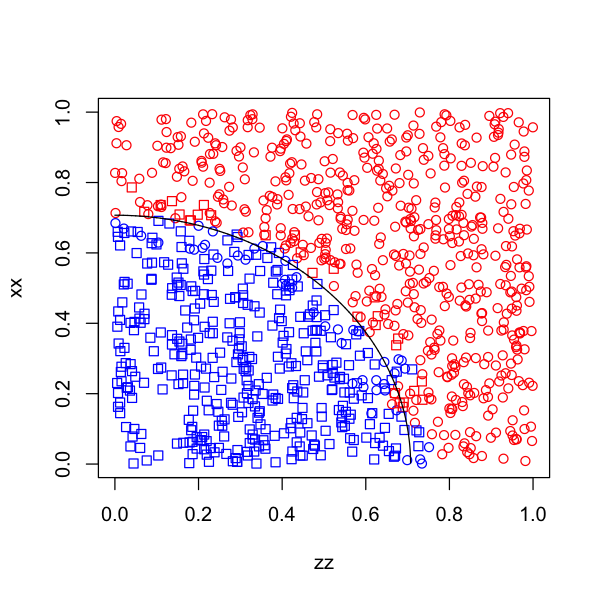

In [31]:
xx<-runif(1000)
zz<-runif(1000)
yy<-ifelse(xx^2+zz^2+runif(1000, min=-0.15, max=0.15)>0.5, 1, 0)

nn.class.p <- ifelse(compute(nn, covariate=data.frame(x=xx, z=zz))$net.result>0.5, 
                     "red", "blue")
plot(xx~zz, pch=yy, col=nn.class.p)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
# ah, much better. We have almost perfect separation of the classes at the limit
# of what is possible given noise levels.

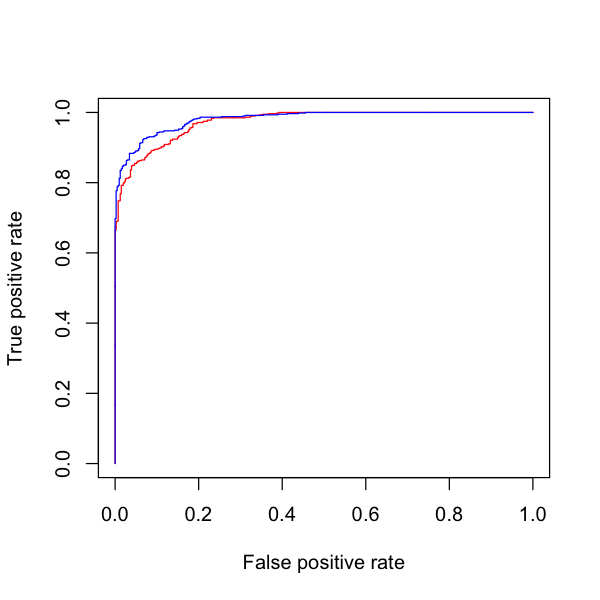

In [33]:
# We can compare the out-of-sample fit characteristics of the glm
# model and the neural network model using the ROC curve.
glm.class.y <- predict(glm.mod, type="response", newdata=data.frame(x=xx, z=zz))
suppressPackageStartupMessages(library(ROCR))
pred <- prediction(predictions=glm.class.y, labels=yy)
perf <- performance(pred, measure = "tpr", x.measure = "fpr") 
plot(perf, col=rainbow(10))

nn.class.py <- compute(nn, covariate=data.frame(x=xx, z=zz))$net.result
pred <- prediction(predictions=nn.class.py, labels=yy)
perf <- performance(pred, measure = "tpr", x.measure = "fpr") 
plot(perf, col="blue", add=T)
#...not surprisingly, the neural network model does better.

----

In [35]:
rm(list=ls())
set.seed(02134)

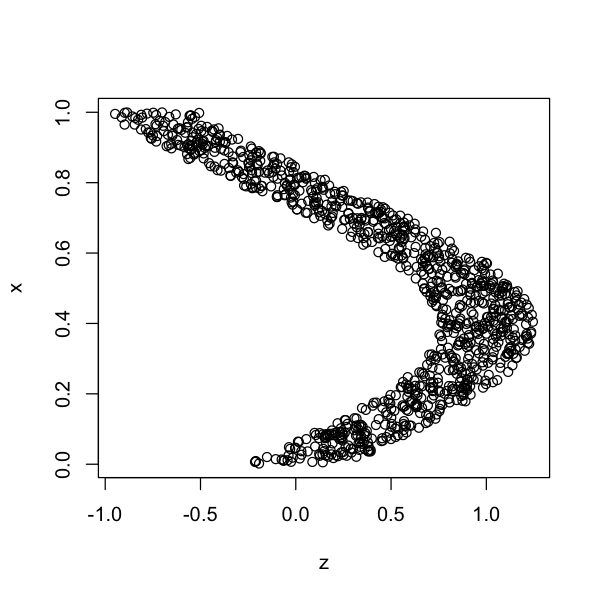

In [36]:
# create a non-linear feature extraction problem
x <- runif(1000)
z <- sin(4*x)+runif(1000, min=-0.25, max=0.25)
plot(x~z)

In [38]:
# x and z clearly have a rather complex common dimensionality.
# We could map the values of x and z that we observe to the 
# value of a continuous variable. And what would that continuous
# variable be?

suppressPackageStartupMessages(library(pcaMethods))
pca.nn<-nlpca(cbind(scale(x),scale(z)), nPcs=1, maxSteps=1000)

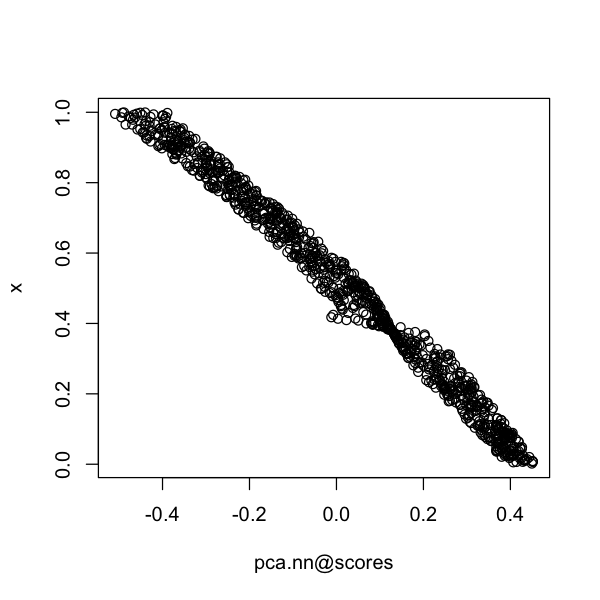

In [39]:
# What is the hidden dimension?
plot(x ~ pca.nn@scores)

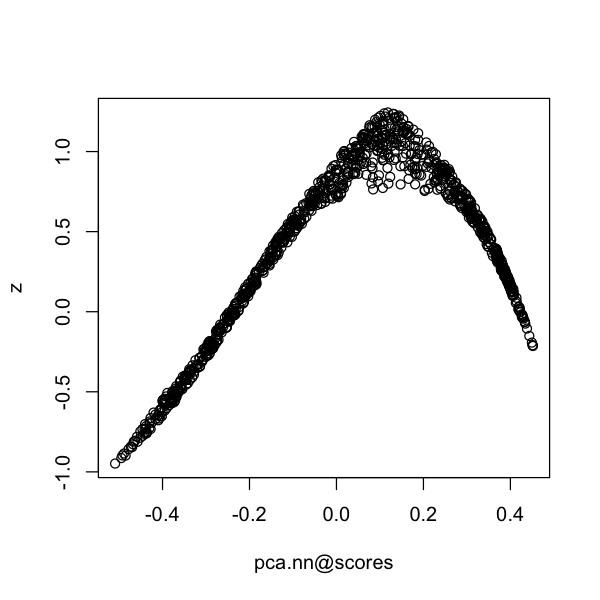

In [40]:
plot(z ~ pca.nn@scores)

# so the hidden dimension is associated with small values of z for 
# large and small vales, and large values of z for middling values.